In [108]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Reading the dataset

df = pd.read_csv('train.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# id column don't have any predictive values

df.drop('Id', inplace=True, axis=1)

In [14]:
# checking Null values

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [16]:
# dropping MiscFeature feature since it's having lot of Null values

df.drop(['MiscFeature'], inplace=True, axis= 1)

In [17]:
# filling NA values

df['LotFrontage'].fillna(0.0, inplace=True)

In [18]:
df['Alley'].fillna('NoAlleyAccess', inplace=True)

In [19]:
df['MasVnrType'].fillna('None', inplace=True)

In [20]:
df['MasVnrArea'].fillna(0, inplace=True)

In [21]:
df['BsmtQual'].fillna('NoBase', inplace=True)

In [22]:
df['BsmtCond'].fillna('NoBase', inplace=True) 

In [23]:
df['BsmtExposure'].fillna('NoBasement', inplace=True) 

In [24]:
df['BsmtFinType1'].fillna('NoBasement', inplace=True) 

In [25]:
df['BsmtFinType2'].fillna('NoBasement', inplace=True) 

In [26]:
df['Electrical'].fillna('NoElectrical', inplace=True) 

In [27]:
df['FireplaceQu'].fillna('NoFireplace', inplace=True) 

In [28]:
df['GarageQual'].fillna('NoGarage', inplace=True) 

In [29]:
df['GarageCond'].fillna('NoGarage', inplace=True) 

In [30]:
df['PoolQC'].fillna('NoPool', inplace=True) 

In [31]:
df['GarageType'].fillna('NoGarage', inplace=True) 
# df['GarageYrBlt'].fillna('NoGarage', inplace=True) 
df['GarageFinish'].fillna('NoGarage', inplace=True) 


In [32]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [33]:
df1 = df2 = df


In [34]:
MSSubClass = pd.get_dummies(df['MSSubClass'], drop_first=True)
MSSubClass.head()

,30,40,45,50,60,70,75,80,85,90,120,160,180,190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [35]:
df = pd.concat([df, MSSubClass], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,60,70,75,80,85,90,120,160,180,190
0,60,RL,65.0,8450,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,NoAlleyAccess,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,NoAlleyAccess,IR1,Lvl,AllPub,FR2,...,1,0,0,0,0,0,0,0,0,0


In [36]:
# dropping MSSubClass colunm since we have created dummy variables
df = df.drop('MSSubClass',axis=1)
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,60,70,75,80,85,90,120,160,180,190
0,RL,65.0,8450,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,0,0,0
1,RL,80.0,9600,Pave,NoAlleyAccess,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,RL,68.0,11250,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,0,0,0
3,RL,60.0,9550,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,Gtl,...,0,1,0,0,0,0,0,0,0,0
4,RL,84.0,14260,Pave,NoAlleyAccess,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


In [37]:
MSZoning = pd.get_dummies(df['MSZoning'], drop_first=True)
df = pd.concat([df, MSZoning], axis=1)
df = df.drop('MSZoning',axis=1)
df.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,85,90,120,160,180,190,FV,RH,RL,RM
0,65.0,8450,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,Pave,NoAlleyAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,Pave,NoAlleyAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,0,0,0,1,0


In [38]:
Street = pd.get_dummies(df['Street'], drop_first=True)
df = pd.concat([df, Street], axis=1)
df = df.drop('Street',axis=1)
df.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,90,120,160,180,190,FV,RH,RL,RM,Pave
0,65.0,8450,NoAlleyAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,1,0,1
1,80.0,9600,NoAlleyAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,0,1,0,1
2,68.0,11250,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,1,0,1
3,60.0,9550,NoAlleyAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,0,0,0,1,0,1
4,84.0,14260,NoAlleyAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,0,0,1,0,1


In [39]:
Alley = pd.get_dummies(df['Alley'], drop_first=True)
df = pd.concat([df, Alley], axis=1)
df = df.drop('Alley',axis=1)
df.head()


,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,160,180,190,FV,RH,RL,RM,Pave,NoAlleyAccess,Pave
0,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,1,0,1,1,0
1,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,0,0,0,1,0,1,1,0
2,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,1,0,1,1,0
3,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,0,0,0,1,0,1,1,0
4,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,0,0,1,0,1,1,0


In [40]:
LotShape = pd.get_dummies(df['LotShape'], drop_first=True)
df = pd.concat([df, LotShape], axis=1)
df = df.drop('LotShape',axis=1)
df.head()


,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,FV,RH,RL,RM,Pave,NoAlleyAccess,Pave,IR2,IR3,Reg
0,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,1,0,1,1,0,0,0,1
1,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,1,0,1,1,0,0,0,1
2,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,1,0,1,1,0,0,0,0
3,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,0,1,0,1,1,0,0,0,0
4,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,1,0,1,1,0,0,0,0


In [41]:
LandContour = pd.get_dummies(df['LandContour'], drop_first=True)
df = pd.concat([df, LandContour], axis=1)
df = df.drop('LandContour',axis=1)
df.head()

,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,RM,Pave,NoAlleyAccess,Pave,IR2,IR3,Reg,HLS,Low,Lvl
0,65.0,8450,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,1,0,0,0,1,0,0,1
1,80.0,9600,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,0,1,1,0,0,0,1,0,0,1
2,68.0,11250,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,1,0,0,0,0,0,0,1
3,60.0,9550,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,0,1,1,0,0,0,0,0,0,1
4,84.0,14260,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,0,1,1,0,0,0,0,0,0,1


In [42]:
Utilities = pd.get_dummies(df['Utilities'], drop_first=True)
df = pd.concat([df, Utilities], axis=1)
df = df.drop('Utilities',axis=1)
df.head()


,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,Pave,NoAlleyAccess,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa
0,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,1,1,0,0,0,1,0,0,1,0
1,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,1,1,0,0,0,1,0,0,1,0
2,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,1,1,0,0,0,0,0,0,1,0
3,60.0,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,1,1,0,0,0,0,0,0,1,0
4,84.0,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,1,1,0,0,0,0,0,0,1,0


In [43]:
LotConfig = pd.get_dummies(df['LotConfig'], drop_first=True)
df = pd.concat([df, LotConfig], axis=1)
df = df.drop('LotConfig',axis=1)
df.head()


,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside
0,65.0,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,0,1,0,0,1,0,0,0,0,1
1,80.0,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,...,0,1,0,0,1,0,0,1,0,0
2,68.0,11250,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,...,0,0,0,0,1,0,0,1,0,0


In [44]:
LandSlope = pd.get_dummies(df['LandSlope'], drop_first=True)
df = pd.concat([df, LandSlope], axis=1)
df = df.drop('LandSlope',axis=1)
df.head()


,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev
0,65.0,8450,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,0,0,1,0,0,0,0,1,0,0
1,80.0,9600,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,0,0,1,0,0,1,0,0,0,0
2,68.0,11250,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,0,0,1,0,0,1,0,0,0,0


In [45]:
Neighborhood = pd.get_dummies(df['Neighborhood'], drop_first=True)
df = pd.concat([df, Neighborhood], axis=1)
df = df.drop('Neighborhood',axis=1)
df.head()


,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,65.0,8450,Norm,Norm,1Fam,2Story,7,5,2003,2003,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,1976,1976,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,Norm,Norm,1Fam,2Story,7,5,2001,2002,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,Norm,Norm,1Fam,2Story,7,5,1915,1970,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,Norm,Norm,1Fam,2Story,8,5,2000,2000,...,1,0,0,0,0,0,0,0,0,0


In [46]:
Condition1 = pd.get_dummies(df['Condition1'], drop_first=True)
df = pd.concat([df, Condition1], axis=1)
df = df.drop('Condition1',axis=1)
df.head()


,LotFrontage,LotArea,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,65.0,8450,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,0,1,1,0,0,0,0,0,0,0
2,68.0,11250,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,0,0,0,1,0,0,0,0,0,0


In [47]:
Condition2 = pd.get_dummies(df['Condition2'], drop_first=True)
df = pd.concat([df, Condition2], axis=1)
df = df.drop('Condition2',axis=1)
df.head()


,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,65.0,8450,1Fam,2Story,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
1,80.0,9600,1Fam,1Story,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,1Fam,2Story,7,5,2001,2002,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
3,60.0,9550,1Fam,2Story,7,5,1915,1970,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1Fam,2Story,8,5,2000,2000,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0


In [48]:
BldgType = pd.get_dummies(df['BldgType'], drop_first=True)
df = pd.concat([df, BldgType], axis=1)
df = df.drop('BldgType',axis=1)
df.head()


,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE
0,65.0,8450,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,...,1,0,0,0,0,0,0,0,0,0
2,68.0,11250,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,...,1,0,0,0,0,0,0,0,0,0


In [49]:
HouseStyle = pd.get_dummies(df['HouseStyle'], drop_first=True)
df = pd.concat([df, HouseStyle], axis=1)
df = df.drop('HouseStyle',axis=1)
df.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,65.0,8450,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [50]:
OverallQual = pd.get_dummies(df['OverallQual'], drop_first=True)
df = pd.concat([df, OverallQual], axis=1)
df = df.drop('OverallQual',axis=1)
df.head()


,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,SLvl,2,3,4,5,6,7,8,9,10
0,65.0,8450,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,1,0,0,0
1,80.0,9600,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,1,0,0,0
3,60.0,9550,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,0,0,0,0,0,0,1,0,0,0
4,84.0,14260,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,1,0,0


In [51]:
OverallCond = pd.get_dummies(df['OverallCond'], drop_first=True)
df = pd.concat([df, OverallCond], axis=1)
df = df.drop('OverallCond',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,9,10,2,3,4,5,6,7,8,9
0,65.0,8450,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
RoofStyle = pd.get_dummies(df['RoofStyle'], drop_first=True)
df = pd.concat([df, RoofStyle], axis=1)
df = df.drop('RoofStyle',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,5,6,7,8,9,Gable,Gambrel,Hip,Mansard,Shed
0,65.0,8450,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,1,0,0,0,0,1,0,0,0,0
1,80.0,9600,1976,1976,CompShg,MetalSd,MetalSd,None,0.0,TA,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,1,0,0,0,0,1,0,0,0,0
3,60.0,9550,1915,1970,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,1,0,0,0,0,1,0,0,0,0


In [53]:
RoofMatl = pd.get_dummies(df['RoofMatl'], drop_first=True)
df = pd.concat([df, RoofMatl], axis=1)
df = df.drop('RoofMatl',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,...,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
0,65.0,8450,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,1976,1976,MetalSd,MetalSd,None,0.0,TA,TA,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,TA,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,0,0,0,1,0,0,0,0,0,0


In [54]:
Exterior1st = pd.get_dummies(df['Exterior1st'], drop_first=True)
df = pd.concat([df, Exterior1st], axis=1)
df = df.drop('Exterior1st',axis=1)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,65.0,8450,2003,2003,VinylSd,BrkFace,196.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,1976,1976,MetalSd,None,0.0,TA,TA,CBlock,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,2001,2002,VinylSd,BrkFace,162.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,1915,1970,Wd Shng,None,0.0,TA,TA,BrkTil,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,2000,2000,VinylSd,BrkFace,350.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0


In [55]:
MasVnrType = pd.get_dummies(df['MasVnrType'], drop_first=True)
df = pd.concat([df, MasVnrType], axis=1)
df = df.drop('MasVnrType',axis=1)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,...,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkFace,None,Stone
0,65.0,8450,2003,2003,VinylSd,196.0,Gd,TA,PConc,Gd,...,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,CBlock,Gd,...,1,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,VinylSd,162.0,Gd,TA,PConc,Gd,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,TA,BrkTil,TA,...,0,0,0,0,0,1,0,0,1,0
4,84.0,14260,2000,2000,VinylSd,350.0,Gd,TA,PConc,Gd,...,0,0,0,0,1,0,0,1,0,0


In [56]:
ExterQual = pd.get_dummies(df['ExterQual'], drop_first=True)
df = pd.concat([df, ExterQual], axis=1)
df = df.drop('ExterQual',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,...,Stucco,VinylSd,Wd Sdng,WdShing,BrkFace,None,Stone,Fa,Gd,TA
0,65.0,8450,2003,2003,VinylSd,196.0,TA,PConc,Gd,TA,...,0,1,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,CBlock,Gd,TA,...,0,0,0,0,0,1,0,0,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,PConc,Gd,TA,...,0,1,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,BrkTil,TA,Gd,...,0,0,1,0,0,1,0,0,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,PConc,Gd,TA,...,0,1,0,0,1,0,0,0,1,0


In [57]:
Foundation = pd.get_dummies(df['Foundation'], drop_first=True)
df = pd.concat([df, Foundation], axis=1)
df = df.drop('Foundation',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood
0,65.0,8450,2003,2003,VinylSd,196.0,TA,Gd,TA,No,...,0,0,0,1,0,0,1,0,0,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,Gd,TA,Gd,...,1,0,0,0,1,1,0,0,0,0
2,68.0,11250,2001,2002,VinylSd,162.0,TA,Gd,TA,Mn,...,0,0,0,1,0,0,1,0,0,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,TA,Gd,No,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,VinylSd,350.0,TA,Gd,TA,Av,...,0,0,0,1,0,0,1,0,0,0


In [58]:
BsmtQual = pd.get_dummies(df['BsmtQual'], drop_first=True)
df = pd.concat([df, BsmtQual], axis=1)
df = df.drop('BsmtQual',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,NoBase,TA
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,1,0,0,0,0,1,0,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,1,1,0,0,0,0,0,1,0,0
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,1,0,0,0,0,0,0,0,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,1,0,0,0,0,1,0,0


In [59]:
Heating = pd.get_dummies(df['Heating'], drop_first=True)
df = pd.concat([df, Heating], axis=1)
df = df.drop('Heating',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Wood,Fa,Gd,NoBase,TA,GasA,GasW,Grav,OthW,Wall
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,0,1,0,0,1,0,0,0,0
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,1,0,0,1,0,0,0,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,0,0,1,1,0,0,0,0
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,1,0,0,1,0,0,0,0


In [60]:
CentralAir = pd.get_dummies(df['CentralAir'], drop_first=True)
df = pd.concat([df, CentralAir], axis=1)
df = df.drop('CentralAir',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Fa,Gd,NoBase,TA,GasA,GasW,Grav,OthW,Wall,Y
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,1,0,0,1,0,0,0,0,1
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,1,0,0,1,0,0,0,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,1,0,0,1,0,0,0,0,1
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,0,1,1,0,0,0,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,1,0,0,1,0,0,0,0,1


In [61]:
Electrical = pd.get_dummies(df['Electrical'], drop_first=True)
df = pd.concat([df, Electrical], axis=1)
df = df.drop('Electrical',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,NoElectrical,SBrkr
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,0,0,1,0,0,0,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,0,0,1,0,0,0,0,1


In [62]:
KitchenQual = pd.get_dummies(df['KitchenQual'], drop_first=True)
df = pd.concat([df, KitchenQual], axis=1)
df = df.drop('KitchenQual',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Wall,Y,FuseF,FuseP,Mix,NoElectrical,SBrkr,Fa,Gd,TA
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,1,0,0,0,0,1,0,1,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,1,0,0,0,0,1,0,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,1,0,0,0,0,1,0,1,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,1,0,0,0,0,1,0,1,0
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,1,0,0,0,0,1,0,1,0


In [63]:
Functional = pd.get_dummies(df['Functional'], drop_first=True)
df = pd.concat([df, Functional], axis=1)
df = df.drop('Functional',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,1,0,1,0,0,0,0,0,0,1
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,1,0,0,1,0,0,0,0,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,1,0,1,0,0,0,0,0,0,1
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,1,0,1,0,0,0,0,0,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,1,0,1,0,0,0,0,0,0,1


In [64]:
GarageQual = pd.get_dummies(df['GarageQual'], drop_first=True)
df = pd.concat([df, GarageQual], axis=1)
df = df.drop('GarageQual',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Min1,Min2,Mod,Sev,Typ,Fa,Gd,NoGarage,Po,TA
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,0,0,1,0,0,0,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,0,0,1,0,0,0,0,1


In [65]:
PavedDrive = pd.get_dummies(df['PavedDrive'], drop_first=True)
df = pd.concat([df, PavedDrive], axis=1)
df = df.drop('PavedDrive',axis=1)
df.head()



,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Mod,Sev,Typ,Fa,Gd,NoGarage,Po,TA,P,Y
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,1,0,0,0,0,1,0,1
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,0,1,0,0,0,0,1,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,1,0,0,0,0,1,0,1
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,1,0,0,0,0,1,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,1,0,0,0,0,1,0,1


In [66]:
PoolQC = pd.get_dummies(df['PoolQC'], drop_first=True)
df = pd.concat([df, PoolQC], axis=1)
df = df.drop('PoolQC',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Fa,Gd,NoGarage,Po,TA,P,Y,Fa,Gd,NoPool
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,0,0,1,0,1,0,0,1
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,0,0,0,1,0,1,0,0,1
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,0,0,1,0,1,0,0,1
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,0,0,1,0,1,0,0,1
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,0,0,1,0,1,0,0,1


In [67]:
Fence = pd.get_dummies(df['Fence'], drop_first=True)
df = pd.concat([df, Fence], axis=1)
df = df.drop('Fence',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Po,TA,P,Y,Fa,Gd,NoPool,GdWo,MnPrv,MnWw
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,1,0,1,0,0,1,0,0,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,1,0,1,0,0,1,0,0,0
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,1,0,1,0,0,1,0,0,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,1,0,1,0,0,1,0,0,0
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,1,0,1,0,0,1,0,0,0


In [68]:
SaleType = pd.get_dummies(df['SaleType'], drop_first=True)
df = pd.concat([df, Fence], axis=1)
df = df.drop('SaleType',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,Y,Fa,Gd,NoPool,GdWo,MnPrv,MnWw,GdWo,MnPrv,MnWw
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,1,0,0,1,0,0,0,0,0,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,1,0,0,1,0,0,0,0,0,0
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,1,0,0,1,0,0,0,0,0,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,1,0,0,1,0,0,0,0,0,0
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,1,0,0,1,0,0,0,0,0,0


In [69]:
SaleCondition = pd.get_dummies(df['SaleCondition'], drop_first=True)
df = pd.concat([df, SaleCondition], axis=1)
df = df.drop('SaleCondition',axis=1)
df.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,MnPrv,MnWw,GdWo,MnPrv,MnWw,AdjLand,Alloca,Family,Normal,Partial
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,0,0,0,0,0,0,1,0


### Checking outliers

<AxesSubplot:xlabel='SalePrice'>

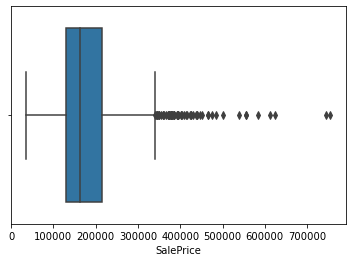

In [70]:
sns.boxplot(df['SalePrice'])

In [71]:
df['SalePrice'].quantile([0,0.25,0.75,0.99,1])

0.00     34900.00
0.25    129975.00
0.75    214000.00
0.99    442567.01
1.00    755000.00
Name: SalePrice, dtype: float64

In [72]:
# removing outliers

df=df[df['SalePrice']<=442567]

<AxesSubplot:xlabel='SalePrice'>

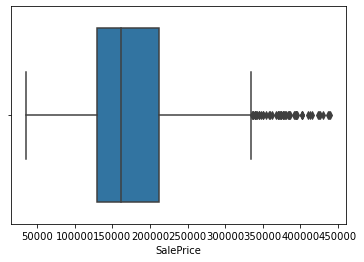

In [73]:
sns.boxplot(df['SalePrice'])

In [79]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,...,MnPrv,MnWw,GdWo,MnPrv,MnWw,AdjLand,Alloca,Family,Normal,Partial
0,65.0,8450,2003,2003,VinylSd,196.0,TA,TA,No,GLQ,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,1976,1976,MetalSd,0.0,TA,TA,Gd,ALQ,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,VinylSd,162.0,TA,TA,Mn,GLQ,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,1915,1970,Wd Shng,0.0,TA,Gd,No,ALQ,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2000,VinylSd,350.0,TA,TA,Av,GLQ,...,0,0,0,0,0,0,0,0,1,0


In [83]:
df.drop('Exterior2nd', inplace=True, axis=1)

In [85]:
df.drop(['ExterCond', 'BsmtCond', 'BsmtExposure'], inplace=True, axis=1)

In [87]:
df.drop(['BsmtFinType1', 'BsmtFinType2'], inplace=True, axis=1)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,...,MnPrv,MnWw,GdWo,MnPrv,MnWw,AdjLand,Alloca,Family,Normal,Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,Ex,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,Ex,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,Ex,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,Gd,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,Ex,...,0,0,0,0,0,0,0,0,1,0


In [88]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MnPrv,MnWw,GdWo,MnPrv,MnWw,AdjLand,Alloca,Family,Normal,Partial
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.00000,1445.000000,...,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,57.284429,10423.696886,1971.004844,1984.668512,98.828374,435.934256,46.659516,564.565398,1047.15917,1153.588927,...,0.107958,0.007612,0.037370,0.107958,0.007612,0.002768,0.008304,0.013841,0.824221,0.081661
std,34.500252,9929.978538,30.109369,20.652450,171.661151,445.895217,161.571276,439.114889,426.37156,376.487932,...,0.310435,0.086947,0.189733,0.310435,0.086947,0.052559,0.090781,0.116871,0.380763,0.273942
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.00000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,7500.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,221.000000,794.00000,880.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,63.000000,9430.000000,1972.000000,1993.000000,0.000000,380.000000,0.000000,474.000000,988.00000,1080.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11478.000000,2000.000000,2004.000000,160.000000,702.000000,0.000000,806.000000,1278.00000,1378.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.00000,4692.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
df.drop(['FireplaceQu','GarageType','GarageFinish', 'GarageCond'], inplace=True, axis=1)

In [96]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 217 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    LotFrontage    1445 non-null   float64
 1    LotArea        1445 non-null   int64  
 2    YearBuilt      1445 non-null   int64  
 3    YearRemodAdd   1445 non-null   int64  
 4    MasVnrArea     1445 non-null   float64
 5    BsmtFinSF1     1445 non-null   int64  
 6    BsmtFinSF2     1445 non-null   int64  
 7    BsmtUnfSF      1445 non-null   int64  
 8    TotalBsmtSF    1445 non-null   int64  
 9    1stFlrSF       1445 non-null   int64  
 10   2ndFlrSF       1445 non-null   int64  
 11   LowQualFinSF   1445 non-null   int64  
 12   GrLivArea      1445 non-null   int64  
 13   BsmtFullBath   1445 non-null   int64  
 14   BsmtHalfBath   1445 non-null   int64  
 15   FullBath       1445 non-null   int64  
 16   HalfBath       1445 non-null   int64  
 17   BedroomAbvGr   1445 non-null   

In [117]:
df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], inplace=True, axis=1)
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,MnPrv,MnWw,GdWo,MnPrv,MnWw,AdjLand,Alloca,Family,Normal,Partial
0,0.223716,-0.198830,0.566262,0.605881,-0.288886,-0.944420,-0.448495,-0.790708,1.198412,-0.118409,...,-0.347885,-0.087583,-0.19703,-0.347885,-0.087583,-0.052686,-0.09151,-0.11847,0.461807,-0.298199
1,0.658645,-0.082979,-0.575917,1.216101,-0.288886,-0.639155,0.504056,0.288053,-0.796823,-0.118409,...,-0.347885,-0.087583,-0.19703,-0.347885,-0.087583,-0.052686,-0.09151,-0.11847,0.461807,-0.298199
2,0.310702,0.083242,0.368129,0.112320,-0.288886,-0.297441,-0.298339,-0.620657,1.226448,-0.118409,...,-0.347885,-0.087583,-0.19703,-0.347885,-0.087583,-0.052686,-0.09151,-0.11847,0.461807,-0.298199
3,0.078739,-0.088016,-0.575917,-0.493413,-0.288886,-0.055962,-0.683113,-0.511718,0.969450,-0.118409,...,-0.347885,-0.087583,-0.19703,-0.347885,-0.087583,-0.052686,-0.09151,-0.11847,-2.165404,-0.298199
4,0.774627,0.386469,1.463689,0.491464,-0.288886,-0.169867,0.229553,-0.022821,1.663344,-0.118409,...,-0.347885,-0.087583,-0.19703,-0.347885,-0.087583,-0.052686,-0.09151,-0.11847,0.461807,-0.298199


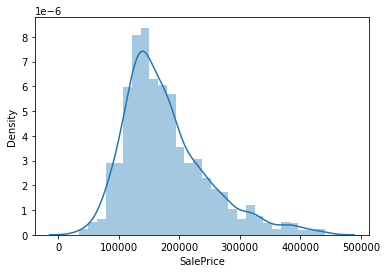

In [102]:
sns.distplot(df['SalePrice'])
plt.show()

Sales price is not equally distributed 

## Splitting the Data into Training and Testing Sets


In [110]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = df.columns
df = pd.DataFrame(scale(df))
df.columns = cols
df.columns

Index([ 'LotFrontage',      'LotArea',    'YearBuilt', 'YearRemodAdd',
         'MasVnrArea',   'BsmtFinSF1',   'BsmtFinSF2',    'BsmtUnfSF',
        'TotalBsmtSF',     '1stFlrSF',
       ...
              'MnPrv',         'MnWw',         'GdWo',        'MnPrv',
               'MnWw',      'AdjLand',       'Alloca',       'Family',
             'Normal',      'Partial'],
      dtype='object', length=216)

In [114]:
y = df.pop('SalePrice')
X = df

In [121]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

In [122]:
# Liner regression

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [123]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

419656042.03472567
[ 1.65466508e-02  9.85054254e-02  2.31148998e-02  1.41345695e+11
  5.12169755e+10  1.39196378e+11 -1.35156831e+11 -4.39290003e+09
 -4.99590775e+09 -5.43080234e+08  5.84353950e+09  2.84976959e-02
  3.71265411e-03  2.98690796e-02  1.09634399e-02 -3.20301056e-02
 -4.70314026e-02 -1.16996765e-02  6.50405884e-03  4.74643707e-02
  3.64418030e-02  2.06646919e-02  1.85050964e-02  4.60052490e-03
  1.74293518e-02  2.49004364e-02  3.05371284e-01  3.52780819e-02
 -1.89857483e-02 -8.86726379e-03  8.37837129e+09 -3.68690491e-02
  5.08499146e-02 -1.32446289e-02  9.33074951e-03 -4.68139648e-02
 -1.75514221e-02  9.01490460e+09 -2.95295715e-02 -1.29013062e-02
 -1.36547089e-02 -1.64871216e-02  1.20870590e-01  4.33044434e-02
  1.66732788e-01  1.33003235e-01  2.25214958e-02  1.34811401e-02
  9.28878784e-03  1.23271942e-02 -1.70183182e-03 -1.47743225e-02
  1.67169571e-02  3.24058533e-03  2.13241577e-02 -1.37252808e-02
  2.53448486e-02 -5.90133667e-03  2.64739990e-03  3.83377075e-03
  2.23

In [124]:
from sklearn.metrics import r2_score, mean_squared_error

In [125]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9468256724475068
-8.210476728653489e+20
53.91801931423877
3.5387116240261504e+23
0.05333137419806011
8.153713419415093e+20


## Ridge and Lasso Regression

In [126]:
# list of alphas to tune - if value too high it will lead to underfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [128]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.33438386e-03  8.27081355e-02  3.46988425e-02  5.37537716e-02
 -3.18834748e-03 -1.37800056e-02  4.08151018e-02  1.04868564e-01
  7.92449646e-02 -1.82661583e-02  1.44887813e-01  4.66377668e-02
 -2.96382820e-03  5.51356149e-02  2.49855931e-02 -1.75208362e-02
 -4.06684488e-02  3.85727177e-02  2.93681881e-02  7.48886951e-02
  3.53744240e-02  3.80820976e-02  3.02933286e-02  4.59403085e-03
  2.08340667e-02  2.23800476e-02  6.77915620e-02  4.25388507e-03
 -2.04044632e-02  1.02341857e-03  2.52719170e-03 -2.35928461e-02
  2.52468267e-02 -8.87913946e-03  6.77439484e-03 -7.99659543e-03
 -7.07940398e-03 -1.23249740e-02 -1.88864987e-02 -3.35551897e-02
 -1.90992799e-03 -1.52974534e-02  2.81214957e-02  5.05914476e-03
  2.40266423e-02  4.06276667e-03  2.74566618e-02  9.08208845e-03
  6.18658848e-03  1.69593879e-02 -2.67028423e-02 -4.54499540e-03
  3.22523856e-02  8.56942147e-03  2.98953882e-02 -1.60220044e-02
  4.04260620e-02 -1.97424304e-03 -4.30120237e-03  8.28183345e-03
  1.90132708e-02 -2.10448

In [129]:
# some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9243271799620235
0.8244750078695682
76.73117386097019
75.65118938726019
0.07589631440254223
0.17431149628400966


## Lasso

In [130]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [132]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [133]:
lasso.coef_

array([-0.        ,  0.07124808,  0.03212074,  0.0625017 ,  0.        ,
       -0.        ,  0.        ,  0.0486788 ,  0.        , -0.02248201,
        0.29884158,  0.05437722, -0.        ,  0.03860221,  0.00663812,
       -0.00450017, -0.05603922,  0.        ,  0.01853912,  0.10508193,
        0.00446129,  0.03306967,  0.03227818,  0.        ,  0.00952302,
        0.0161308 ,  0.00236   , -0.        , -0.00447676,  0.        ,
        0.        , -0.01972436,  0.00659679, -0.        ,  0.        ,
        0.        , -0.        , -0.00058453, -0.00154973, -0.02365485,
       -0.        , -0.        ,  0.00406311, -0.        ,  0.00032045,
       -0.01451939,  0.02335598,  0.00262871,  0.        ,  0.00913588,
       -0.01887888, -0.        ,  0.00790049,  0.        ,  0.00429904,
       -0.00634884,  0.03795979, -0.        , -0.        ,  0.        ,
        0.00346208, -0.        ,  0.        , -0.        ,  0.00359503,
        0.02297489,  0.        ,  0.05226867, -0.01442013, -0.  

In [134]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9086105656727449
0.8267730922491878
92.66759942210606
74.66071609613297
0.09165934660940264
0.17202929976067505


In [135]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.468257e-01,0.924327,0.908611
1,R2 Score (Test),-8.210477e+20,0.824475,0.826773
2,RSS (Train),5.391802e+01,76.731174,92.667599
3,RSS (Test),3.538712e+23,75.651189,74.660716
4,MSE (Train),2.309359e-01,0.275493,0.302753
5,MSE (Test),2.855471e+10,0.417506,0.414764
